In [14]:
import cv2
from pytesseract import pytesseract
from IPython import display


img = cv2.imread("./rami_marine_dataset/class_2/number_2/img_0038.png")
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgth = cv2.adaptiveThreshold(imggray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,3) 

backtorgb = cv2.cvtColor(imgth,cv2.COLOR_GRAY2RGB)
cv2.imwrite("test.png", backtorgb)

#using pytesseract to convert from image to string
name_str = pytesseract.image_to_string(backtorgb, lang='eng',config='--psm 6')

#print the values
print(name_str)


TesseractError: (1, 'Error opening data file /home/jan/anaconda3/envs/rami/share/tessdata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'eng\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [4]:
pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  Using cached numpy-1.23.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pytesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 378.4 kB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2
from pytesseract import pytesseract
from IPython import display
import numpy as np

img = cv2.imread("rami_marine_dataset/class_2/number_2/img_0038.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of black color in HSV
lower_val = np.array([0,0,0])
upper_val = np.array([255,109,255])

# Threshold the HSV image to get only black colors
mask = cv2.inRange(hsv, lower_val, upper_val)


backtorgb = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
cv2.imwrite("test.png", backtorgb)

#using pytesseract to convert from image to string
name_str = pytesseract.image_to_string(backtorgb, lang='eng',config='--psm 6')

#print the values
print(name_str)


TesseractError: (1, 'Error opening data file /home/jan/anaconda3/envs/rami/share/tessdata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'eng\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

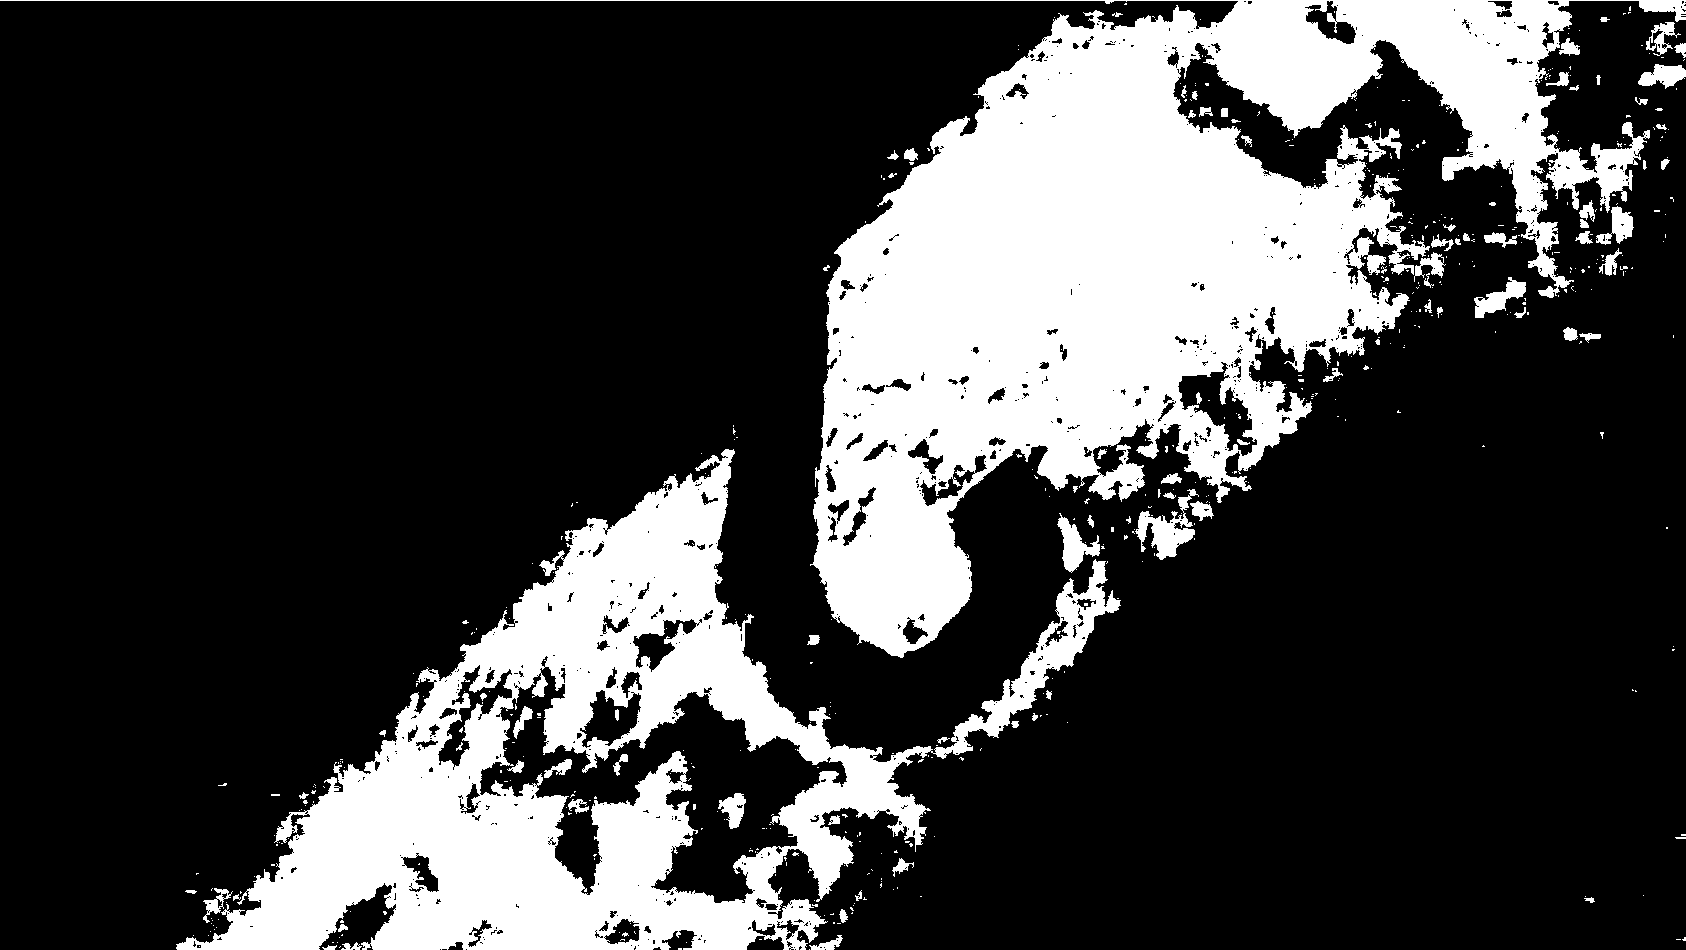

In [22]:
display.Image("test.png")

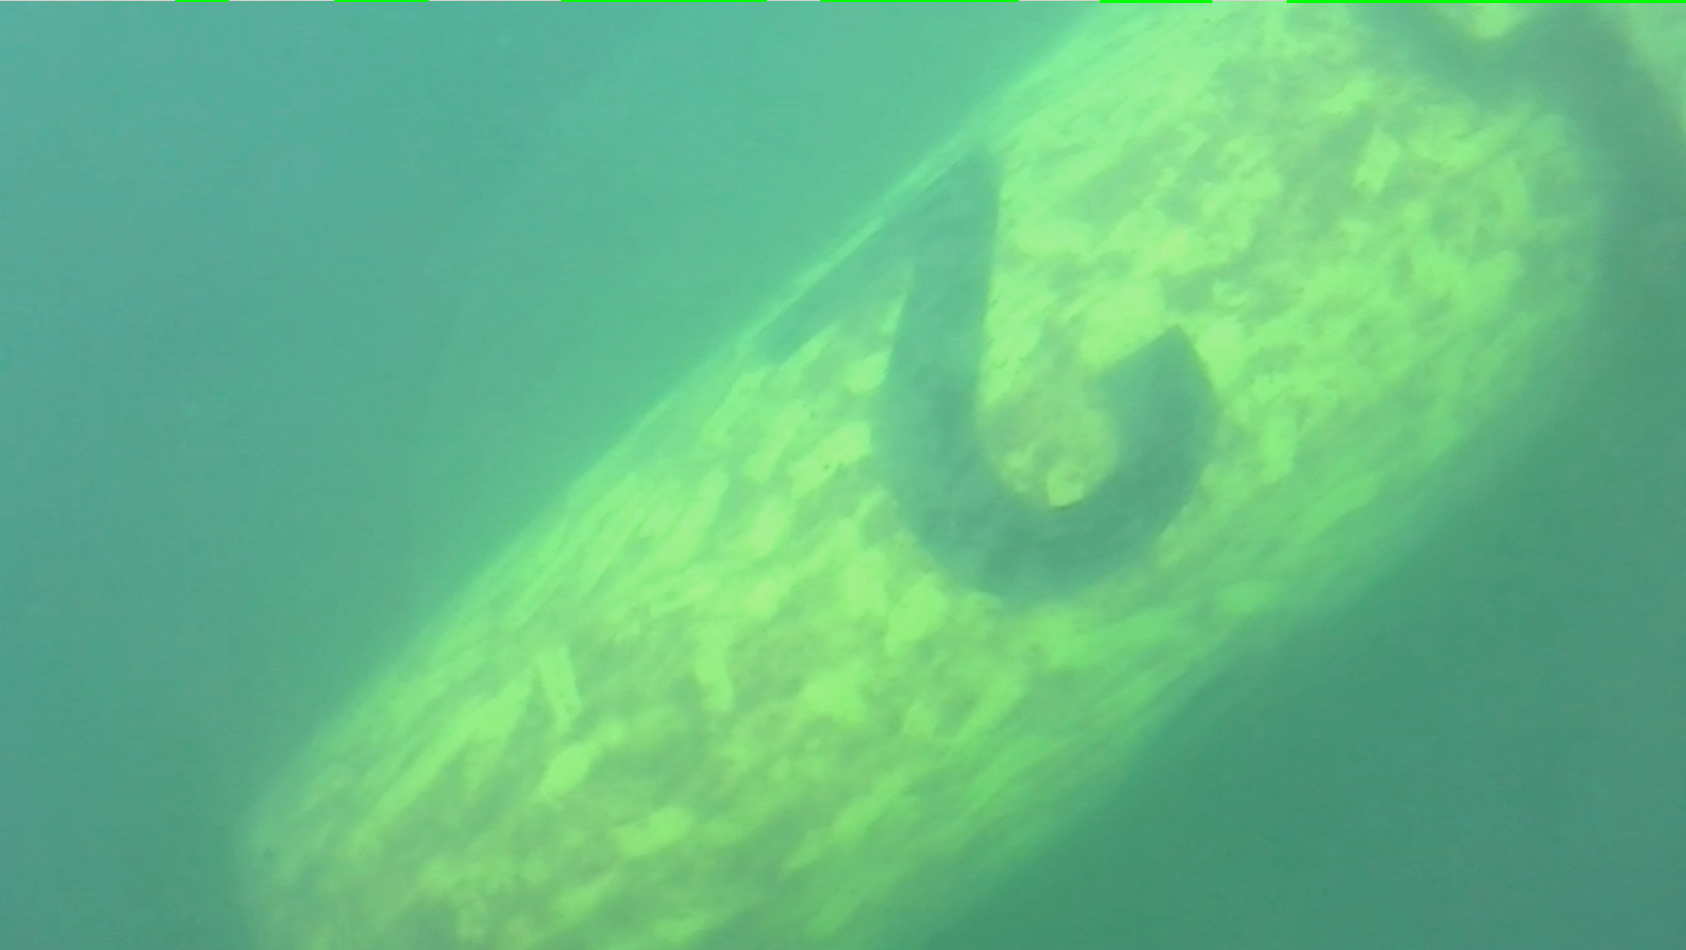

In [12]:
import cv2
import numpy as np

# Read image
image = cv2.imread("rami_marine_dataset/class_2/number_2/img_0038.png")

# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)

# Apply HoughLinesP method to
# to directly obtain line end points
lines_list =[]
lines = cv2.HoughLinesP(
			edges, # Input edge image
			1, # Distance resolution in pixels
			np.pi/180, # Angle resolution in radians
			threshold=200, # Min number of votes for valid line
			minLineLength=50, # Min allowed length of line
			maxLineGap=10 # Max allowed gap between line for joining them
			)

# Iterate over points
for points in lines:
	# Extracted points nested in the list
	x1,y1,x2,y2=points[0]
	# Draw the lines joing the points
	# On the original image
	cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
	# Maintain a simples lookup list for points
	lines_list.append([(x1,y1),(x2,y2)])
	
# Save the result image
cv2.imwrite('linesDetected.png', image)
display.Image("linesDetected.png")
